# **Introduction**
In March 2020, **COVID-19** was identified as ***pandemic*** by the World Health Organisation (WHO). Since this is a deadly infectious disease, the world has been taking serious actions to stop the spread of the virus. Scientist and researchers all over the world have been working together to find the way to deal with the virus.
During this crisis, data seems to be a good weapon to help fight against the deadly virus. By analysing the collected data, we can have a deeper understanding of the virus's effect and take action accordingly.
In this project, we will analyse a dataset about **COVID-19** to see the world situation at that time by looking at some statistics, visualisations and then make some insightful interpretation.

### **1. About the dataset**

In this project, we will use the **coronavirus** ***dataset***, which is a part of the **coronavirus** ***package***. 
This dataset contains summary data of Novel coronavirus COVID-19 (2019 SARS-CoV-2) cases (confirmed/ recovered/ death) by state/ province on a daily basis from 22 Jan 2020 to 16 Feb 2020. The collected data is sourced from Johns Hopkins University Center for Systems Science and Engineering (JHU CCSE) Coronavirus (https://systems.jhu.edu/research/public-health/ncov/)

### **2. Approach/ Analytic techinques**

First, we will import the dataset and preprocess the data before going into detailed analysis. In the stage of preprocessing, we will come to check for invalid/ null values, clean the data and then look at the data statistics to make sure it is ready for further analysis. Then we will come to analyse the data by breaking it down into subsets. Since the data was recorded in between January and February 2020, when the virus seriously hit China and started to spread out to other parts of the world, we will break this dataset down in to 3 main parts for further analysis:



*   **`World general situation`**
*   **`Within Mainland China`**
*   **`Outside Mainland China (the rest of the world)`**

For each part, the analysis work will consist of getting objectives, processing data, visualising and interpreting the results.

### **3. Outcome expectations**

Given the final results of analysis, this project is expected to give a closer insight of the effects this virus had on the world by looking at different **metrics**, **visualisations** so that appropriate and prompt plan to deal with the crisis can be made accordingly






## **Data Analysis**

### **1. Required packages**

To work with analysis in R, we need to use some **`libraries`** from different **`packages`** that support us with useful ***`functions`***. 
Let's install and import necessary packages that are used throught out this project:

In [0]:
#1: Dataset package
install.packages('coronavirus')
#2: Functions for data preparation
install.packages('dplyr')
install.packages('tidyr')
#3: Visualisation packages
install.packages('ggplot2')
install.packages('maps')
install.packages('ggthemes')
install.packages('RColorBrewer')
install.packages('GGally')

There are `3 groups` of packages used in this project, including the **`coronavirus` dataset package**, **functional packages** for data processing and **visualisation packages**.

After installation, let's **`import`** these packages for further use during the project.

In [0]:
library(coronavirus)
library(tidyr)
library(dplyr)
library(ggplot2)
library(maps)
library(ggthemes)
library(RColorBrewer)
library(GGally)

### **2. Data preparation**

Before going into details, let's have a look at the appearance of the dataset.

In [0]:
head(coronavirus)

Province.State,Country.Region,Lat,Long,date,cases,type
<chr>,<chr>,<dbl>,<dbl>,<date>,<int>,<chr>
,Japan,35.67620,139.6503,2020-01-22,2,confirmed
,South Korea,37.56650,126.9780,2020-01-22,1,confirmed
,Thailand,13.75630,100.5018,2020-01-22,2,confirmed
Anhui,Mainland China,31.82571,117.2264,2020-01-22,1,confirmed
Beijing,Mainland China,40.18238,116.4142,2020-01-22,14,confirmed
Chongqing,Mainland China,30.05718,107.8740,2020-01-22,6,confirmed


The **`head()`** function returns the first six observations of the coronavirus dataset. As we can see, the dataset contains both **numerical** and **character** values which are distributed into rows and columns.

Variables explaination:
* **`Province.State`**: Province or State name
* **`Country.Region`**: Country or Region name
* **`Lat`**: Latitude value of the place
* **`Long`**: Longtitude value of the place
* **`date`**: The time when the data was recorded
* **`cases`**: Number of cases recorded
* **`type`**: Type of case (Confirmed/ Recovered/ Death)


A closure look into the structure of the dataset can be obtained by calling **`str()`** function:

In [0]:
str(coronavirus)

tibble [1,507 × 7] (S3: tbl_df/tbl/data.frame)
 $ Province.State: chr [1:1507] "" "" "" "Anhui" ...
 $ Country.Region: chr [1:1507] "Japan" "South Korea" "Thailand" "Mainland China" ...
 $ Lat           : num [1:1507] 35.7 37.6 13.8 31.8 40.2 ...
 $ Long          : num [1:1507] 140 127 101 117 116 ...
 $ date          : Date[1:1507], format: "2020-01-22" "2020-01-22" ...
 $ cases         : int [1:1507] 2 1 2 1 14 6 1 26 2 1 ...
 $ type          : chr [1:1507] "confirmed" "confirmed" "confirmed" "confirmed" ...


As the result suggests, this dataset consists of **1507 rows (records)** and **7 columns (features)**. The features details suggest that the dataset is of 3 data types:


*   **Character**: `Province.State`, `Country.Region`, `type`
*   **Numerical**: `Lat`, `Long`, `cases`
* **Datetime**: `date`

The structure table also suggests that there is **no missing value** in the dataset since all the columns are of ***length 1507***.


> Detailed summary of each variable:






In [0]:
summary(coronavirus$Province.State)

   Length     Class      Mode 
     1507 character character 

In [0]:
unique(coronavirus$Province.State)
length(unique(coronavirus$Province.State, na.rm = T))

[1] ""                             "Anhui"                       
 [3] "Beijing"                      "Chongqing"                   
 [5] "Fujian"                       "Guangdong"                   
 [7] "Guangxi"                      "Guizhou"                     
 [9] "Hainan"                       "Hebei"                       
[11] "Henan"                        "Hubei"                       
[13] "Hunan"                        "Jiangsu"                     
[15] "Jiangxi"                      "Liaoning"                    
[17] "Macau"                        "Ningxia"                     
[19] "Seattle, WA"                  "Shandong"                    
[21] "Shanghai"                     "Shanxi"                      
[23] "Sichuan"                      "Taiwan"                      
[25] "Tianjin"                      "Yunnan"                      
[27] "Zhejiang"                     "Gansu"                       
[29] "Heilongjiang"                 "Hong Kong"                   
[31] "Jilin"                        "Shaanxi"                     
[33] "Xinjiang"                     "Chicago, IL"                 
[35] "Inner Mongolia"               "Qinghai"                     
[37] "Los Angeles, CA"              "New South Wales"             
[39] "Orange, CA"                   "Tempe, AZ"                   
[41] "Toronto, ON"                  "Victoria"                    
[43] "British Columbia"             "Queensland"                  
[45] "Tibet"                        "London, ON"                  
[47] "Santa Clara, CA"              "Boston, MA"                  
[49] "South Australia"              "San Benito, CA"              
[51] "Madison, WI"                  "Diamond Princess cruise ship"
[53] "San Diego County, CA"         "San Antonio, TX"

[1] 54

> The **`Province.State`** variable consists of 54 different values.

In [0]:
summary(coronavirus$Country.Region)
unique(coronavirus$Country.Region)
length(unique(coronavirus$Country.Region))

   Length     Class      Mode 
     1507 character character 

[1] "Japan"                "South Korea"          "Thailand"            
 [4] "Mainland China"       "Macau"                "US"                  
 [7] "Taiwan"               "Singapore"            "Vietnam"             
[10] "Hong Kong"            "France"               "Malaysia"            
[13] "Nepal"                "Australia"            "Canada"              
[16] "Cambodia"             "Germany"              "Sri Lanka"           
[19] "Finland"              "United Arab Emirates" "India"               
[22] "Philippines"          "Italy"                "Russia"              
[25] "Sweden"               "UK"                   "Spain"               
[28] "Belgium"              "Others"               "Egypt"

[1] 30

> There are 30 unique values recorded in the **`Country.Region`** variable, which means that at the given time from 22 Jan to 16 Feb 2020, the virus had spread to ***30 countries/ regions***.

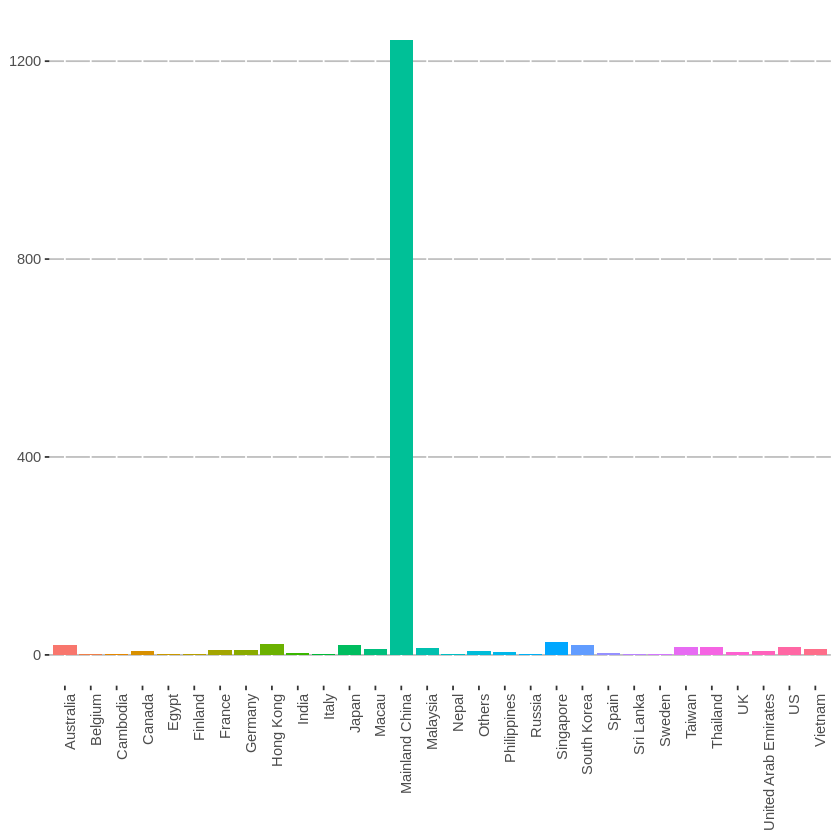

In [0]:
ggplot(coronavirus, aes(x = Country.Region, fill = Country.Region)) + geom_bar() + 
theme(axis.text.x = element_text(angle = 90, hjust = 1)) + theme(legend.position = 'none') +
theme(panel.background = element_blank(), panel.grid.major.y = element_line(color = 'grey'), axis.title = element_blank())

> The visualisation shows that most of the cases in this dataset was recorded within **Mainland China** region while a few cases were recorded elsewhere.

> **`Lat`** and **`Long`** statistics

In [0]:
summary(coronavirus$Lat)
summary(coronavirus$Long)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -37.81   26.82   31.83   31.24   37.58   61.92 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -123.1   107.9   113.6   107.6   118.2   153.0 

In [0]:
str(coronavirus$date)
length(unique(coronavirus$date))

 Date[1:1507], format: "2020-01-22" "2020-01-22" "2020-01-22" "2020-01-22" "2020-01-22" ...


[1] 26

> **`date`** variable shows that the data was recorded in a period of 26 days.

In [0]:
summary(coronavirus$cases)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  -20.00     2.00     5.00    55.65    18.00 14840.00 

> The statistics about **`cases`** variable show the appearance of **invalid values** in this dataset since the ***minimum*** number of cases is ***negative***. After inspecting with the source data, these values are confirmed to be invalid by `accident error`. We will get rid of these values in the later data processing step.

In [0]:
summary(coronavirus$type)
unique(coronavirus$type)

   Length     Class      Mode 
     1507 character character 

[1] "confirmed" "death"     "recovered"

> The summary of variable **`type`** shows that this variable has only **3 unique values** namely ***confirmed***/ ***death***/ ***recovered***. We will change this variable into **categorical** variable for better aalysis.

As suggested from the variable **`cases`** summary, we would have a closer look at `invalid values` in the dataset by **filtering** records that have negative number of cases.

In [0]:
coronavirus %>% filter(cases < 0)

Province.State,Country.Region,Lat,Long,date,cases,type
<chr>,<chr>,<dbl>,<dbl>,<date>,<int>,<chr>
,Japan,35.67620,139.6503,2020-01-23,-1,confirmed
Queensland,Australia,-27.46980,153.0251,2020-01-31,-1,confirmed
Queensland,Australia,-27.46980,153.0251,2020-02-02,-1,confirmed
Shanxi,Mainland China,37.57769,112.2922,2020-02-03,-1,recovered
Guizhou,Mainland China,26.81536,106.8748,2020-02-06,-3,recovered
,Japan,35.67620,139.6503,2020-02-07,-20,confirmed
Ningxia,Mainland China,37.26923,106.1655,2020-02-09,-2,recovered
Heilongjiang,Mainland China,47.86200,127.7622,2020-02-11,-2,recovered
Guangxi,Mainland China,23.82908,108.7881,2020-02-12,-1,recovered


There are total **10 invalid data** in this dataset. We will get rid of these data by **dropping** these rows.

The newly processed dataset will be stored in the **`corona`** variable for further analysis.

In [0]:
corona <- coronavirus %>% filter(cases >= 0)

Since we want to convert the **`type`** variable into categorical variable, we will use the **`as.factor()`** function.

In [0]:
corona$type <- as.factor(corona$type)
head(corona)

Province.State,Country.Region,Lat,Long,date,cases,type
<chr>,<chr>,<dbl>,<dbl>,<date>,<int>,<fct>
,Japan,35.67620,139.6503,2020-01-22,2,confirmed
,South Korea,37.56650,126.9780,2020-01-22,1,confirmed
,Thailand,13.75630,100.5018,2020-01-22,2,confirmed
Anhui,Mainland China,31.82571,117.2264,2020-01-22,1,confirmed
Beijing,Mainland China,40.18238,116.4142,2020-01-22,14,confirmed
Chongqing,Mainland China,30.05718,107.8740,2020-01-22,6,confirmed


The new description for datatype of variable **`type`** has been changed to factor.

### **3. Data Analysis**

In this part, we will try to make **insightful information** out of the avalable data by ***processing*** and ***visualising***.

#### ***World General Status***

Let's check for correlation across variables:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



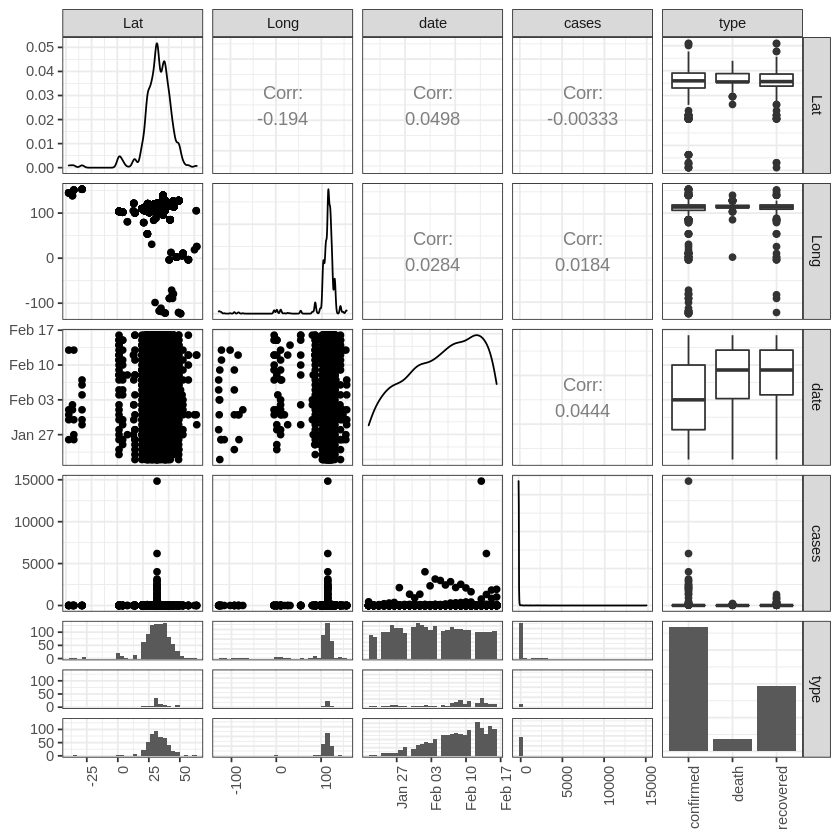

In [0]:
ggpairs(corona[,-c(1,2)]) + theme_bw() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

> As can be seen from the graph, the distribution of both **`Lat`** and **`Long`** shows a focused area, which is China. This is compatible with the previous finding when we said most of the cases were recorded within Mainland China. 

> The correlation between **`cases`** and **`date`** shows that the number of cases started increasing between Jan 27 and Feb 10.

> The plot also depicts that approximately half of the confirmed cases had recovered while the number of death was considered significant as compared to other pandemic.

Let's see how deadly was this virus at the time by calculating the **death rate** and **recovery rate**.

In [0]:
ntype_cases <- corona %>% group_by(type) %>% summarise(total = sum(cases))
ntype_cases

type,total
<fct>,<int>
confirmed,71249
death,1770
recovered,10878


In [0]:
death_rate <- ntype_cases$total[2] / ntype_cases$total[1]
recovery_rate <- ntype_cases$total[3] / ntype_cases$total[1]
death_rate
recovery_rate

[1] 0.02484245

[1] 0.1526758

> Within the given period of time, the **death rate** was at the approximately of ***2.5*** percent while the **recovery rate** was about ***15*** percent. 
At this early stage, it is hard to determine if COVID-19 is deadlier than any other pandemics/ epidemics as the crisis was not over yet and the data collected just presents a certain period of time.

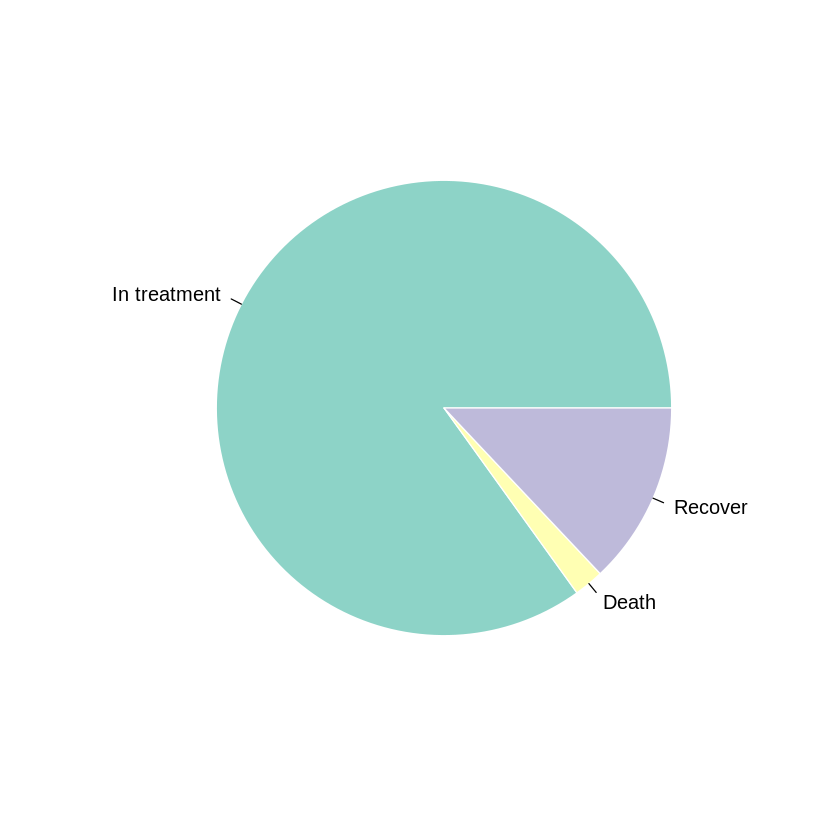

In [0]:
myPalette <- brewer.pal(3, 'Set3')
pie(ntype_cases$total, labels = c('In treatment', 'Death', 'Recover'), border = 'white', col = myPalette)

> The pie chart shows the proportion of each type recorded in this dataset. Most of the cases were still **active** while a small proportion **recovered** or even **died** of the virus.

Let's see how the virus **spread** to parts of the world by plotting it on the **world map**.


Warning message:
“Ignoring unknown aesthetics: x, y”


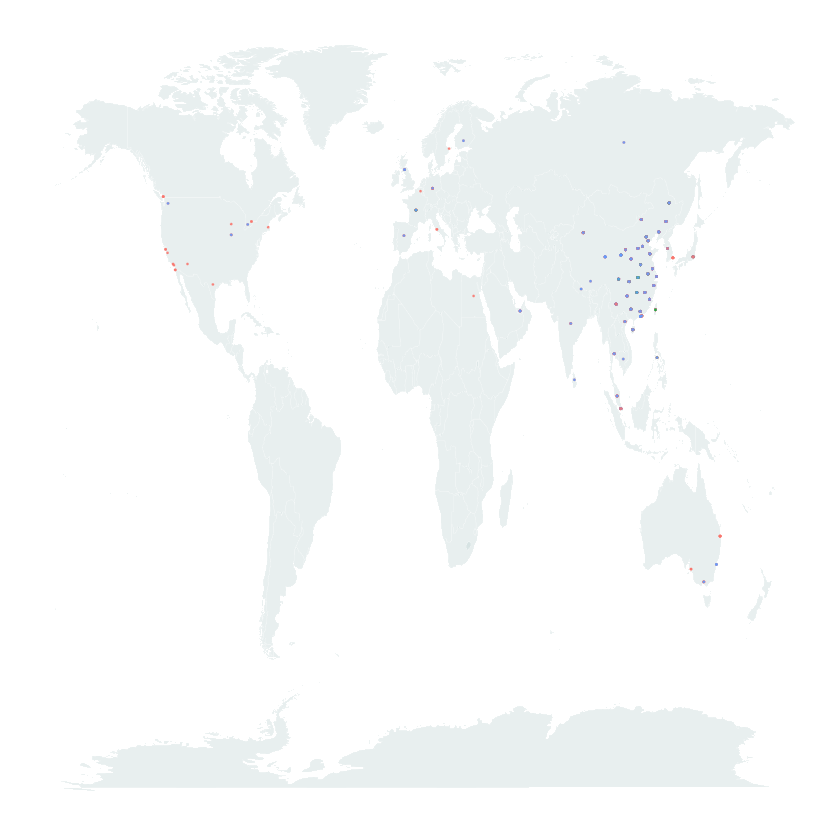

In [0]:
world <- map_data('world')
ggplot() + geom_map(data=world, map=world, aes(long, lat, map_id=region), color="white", fill="#d1e0e0", size = 0.05, alpha=0.5) +
geom_point(data=corona, aes(x=Long, y=Lat, color=type), size=0.15, alpha=.7) + theme_map() +  
theme(strip.background=element_blank()) + 
theme(legend.position="none")

Let's have a look at the world situation by inspecting each status



In [0]:
confirmed <- corona %>% filter(type == 'confirmed')
recovered <- corona %>% filter(type == 'recovered')
death <- corona %>% filter(type == 'death')

Let's see how many country has witnessed death cases:

In [0]:
unique(death$Country.Region)

[1] "Mainland China" "Philippines"    "Hong Kong"      "Japan"         
[5] "France"         "Taiwan"

 > During this period of time, **6** out of **30** country have witnessed cases of death by COVID-19

Let's see how was the situation day by day

In [0]:
world_stats_date <- corona %>% group_by(date, type) %>% summarise(total = sum(cases))

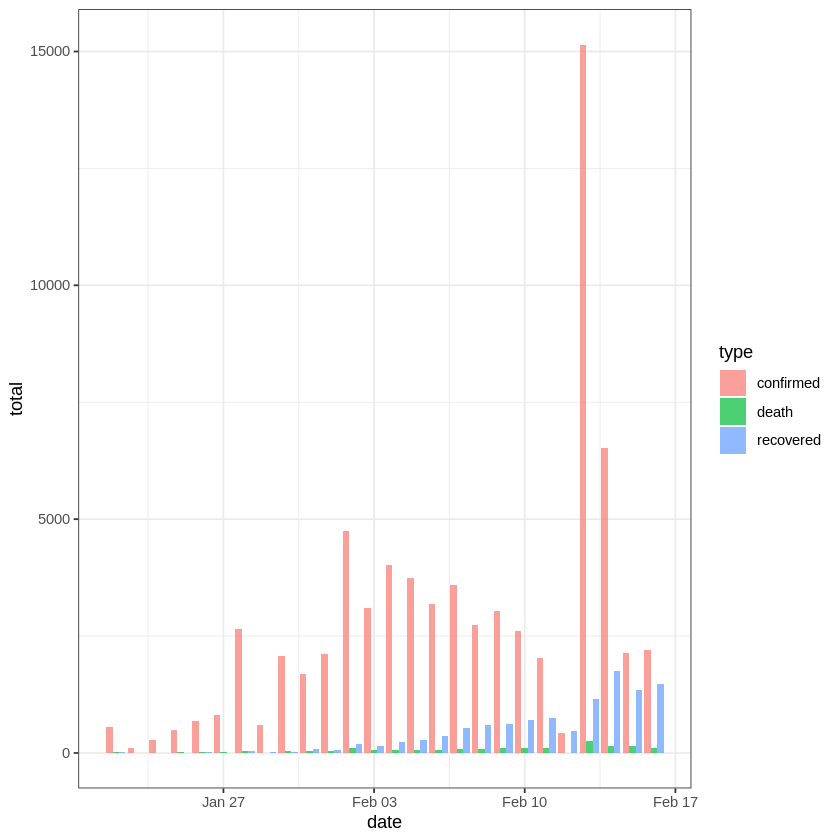

In [0]:
ggplot(world_stats_date, aes(x = date, y = total, fill = type)) + 
geom_bar(position = 'dodge', stat = 'identity', alpha = .7) + theme_bw()

> As you can see, the number of cases exceptionally rose to reach the peak of **over 15000** cases on Feb 13.

The next figures will help understand the patterns in their own scales.

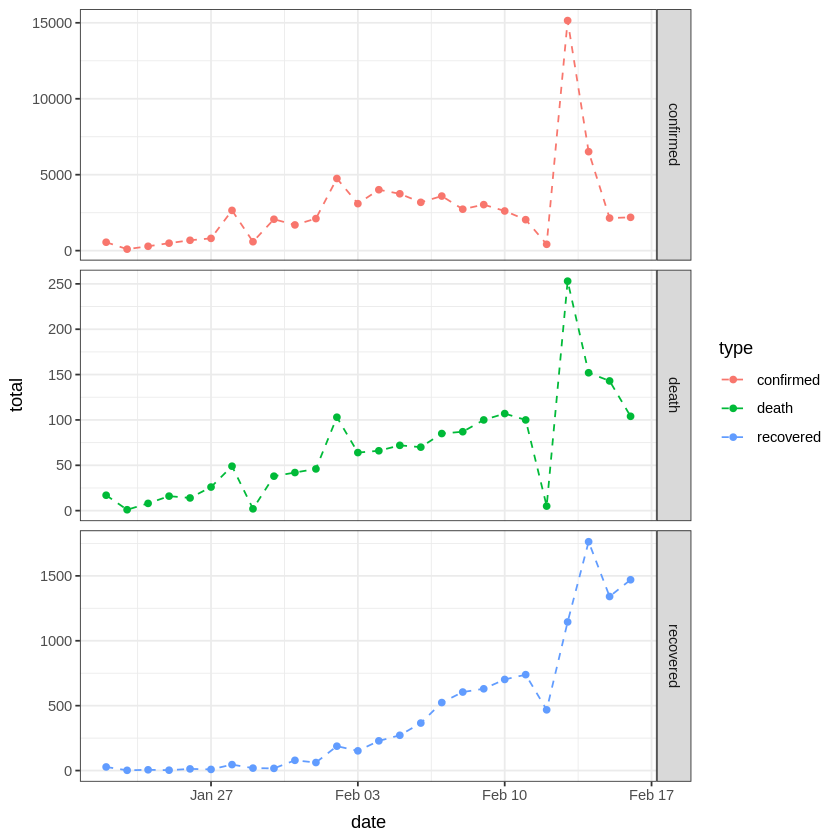

In [0]:
ggplot(world_stats_date, aes(x = date, y = total, col = type)) + geom_line(linetype = 'dashed') + 
geom_point() + facet_grid(type~., scales = 'free_y') + theme_bw()

> We can see that the virus appeared in **Asia**, **America** and **Oceania** continents, the ***epicentre*** can be easily seen as **China**.

Let's see the status of the top 5 countries which had the most confirmed cases of COVID-19. 
First, we have to make a new variable to store summary information before going to visualisation.

In [0]:
confirmed_country <- confirmed %>% group_by(Country.Region) %>% summarise(total = sum(cases)) %>% arrange(by = desc(total))
confirmed_country[1:5,]

Country.Region,total
<chr>,<int>
Mainland China,70446
Others,355
Japan,80
Singapore,75
Hong Kong,57


In [0]:
top_5 <- corona %>% filter(Country.Region %in% c('Mainland China', 'Others', 'Japan', 'Singapore', 'Hong Kong')) %>% group_by(Country.Region, date)

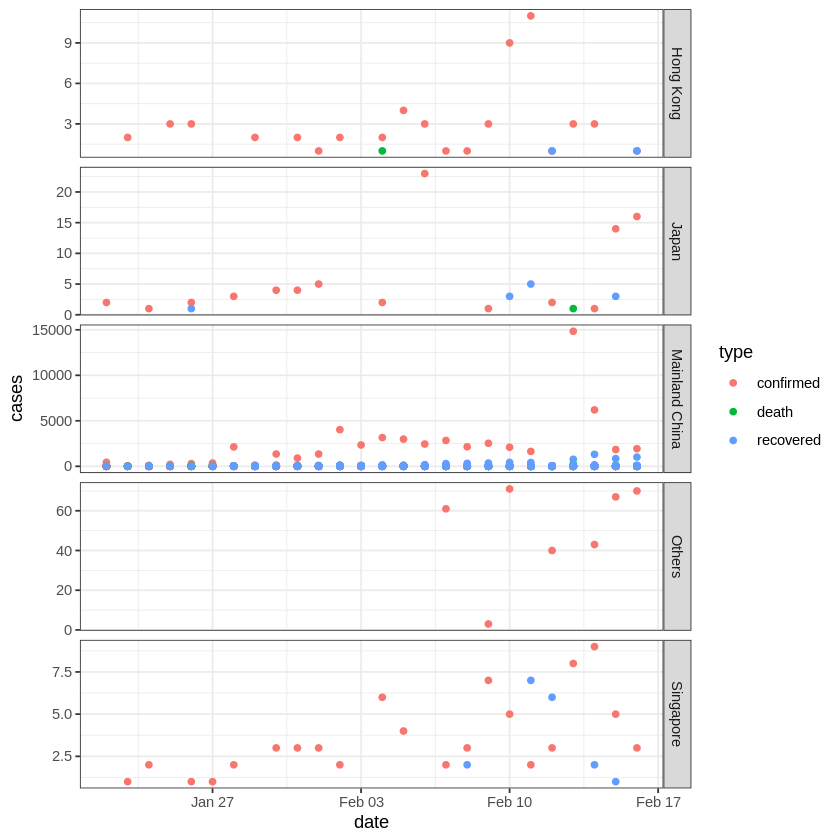

In [0]:
ggplot(top_5, aes(x = date, y = cases, col = type)) + geom_point() + 
facet_grid(Country.Region~., scales = 'free_y') + theme_bw()

> Of the top 5 countries, apart from **Mainland China**, **Hongkong** and **Japan** also witnessed **death** caused by COVID-19. In this list, only other countries didn't record any recovery cases at the time.

The following lines of code calculate the number of **new cases** on the daily basis.

In [0]:
newCases <- confirmed %>% group_by(date) %>% summarise(total = sum(cases)) %>% mutate(new_cases = total - lag(total, default = 0))
newCases$new_cases[1] <- 0
head(newCases)

date,total,new_cases
<date>,<int>,<dbl>
2020-01-22,555,0
2020-01-23,99,-456
2020-01-24,288,189
2020-01-25,493,205
2020-01-26,684,191
2020-01-27,809,125


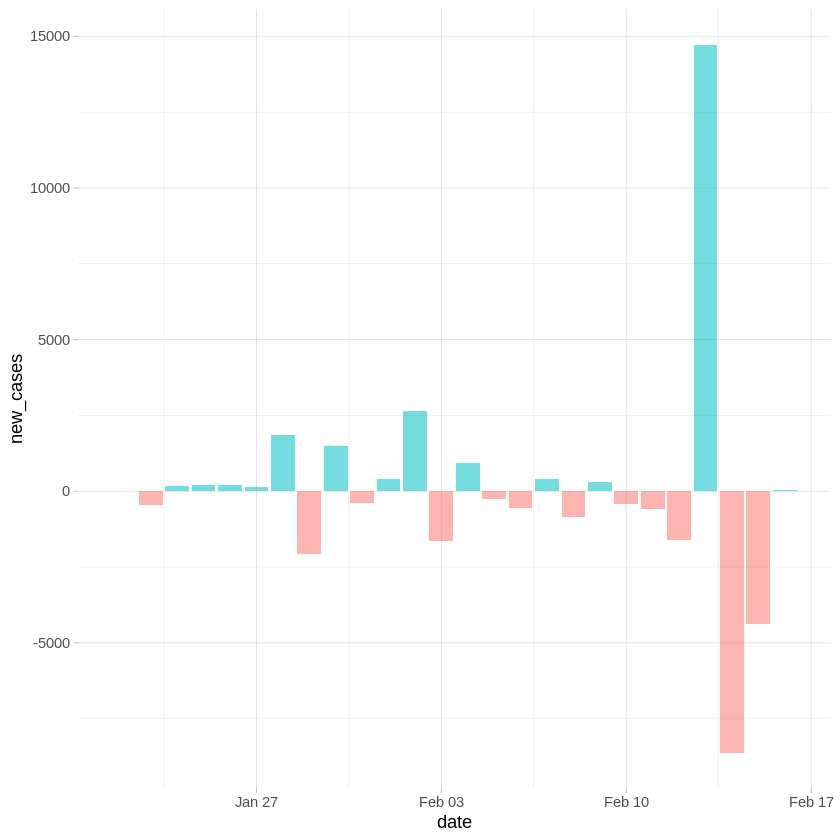

In [0]:
ggplot(newCases, aes(x = date, y = new_cases)) + 
geom_bar(stat = 'identity', aes(fill = ifelse(new_cases>0, "type2", "type1"), alpha=0.9)) +
theme_light() + 
theme(legend.position = "none", panel.border = element_blank(),)

> If the number of new cases increases, the color will be **aqua** and **red** otherwise. As can be seen, there was a fluctuate trend when the number of new cases kept going up and down. 

#### ***Within Mainland China Analysis***

> At this stage, we will come to have specific analysis of relating to **Mainland China** only. To do this, a new variable called **`China`** has been created.


In [0]:
China <- corona %>% filter(Country.Region == 'Mainland China')
str(China)

tibble [1,237 × 7] (S3: tbl_df/tbl/data.frame)
 $ Province.State: chr [1:1237] "Anhui" "Beijing" "Chongqing" "Fujian" ...
 $ Country.Region: chr [1:1237] "Mainland China" "Mainland China" "Mainland China" "Mainland China" ...
 $ Lat           : num [1:1237] 31.8 40.2 30.1 26.1 23.3 ...
 $ Long          : num [1:1237] 117 116 108 118 113 ...
 $ date          : Date[1:1237], format: "2020-01-22" "2020-01-22" ...
 $ cases         : int [1:1237] 1 14 6 1 26 2 1 4 1 5 ...
 $ type          : Factor w/ 3 levels "confirmed","death",..: 1 1 1 1 1 1 1 1 1 1 ...


> The structure table of the **`China`** variable shows that **1237** out of **1507** datapoints in this dataset were recorded in Mainland China region.

Let's have a look at China's statistics by date

In [0]:
China_stats_date <- China %>% group_by(date, type) %>% summarise(total = sum(cases))

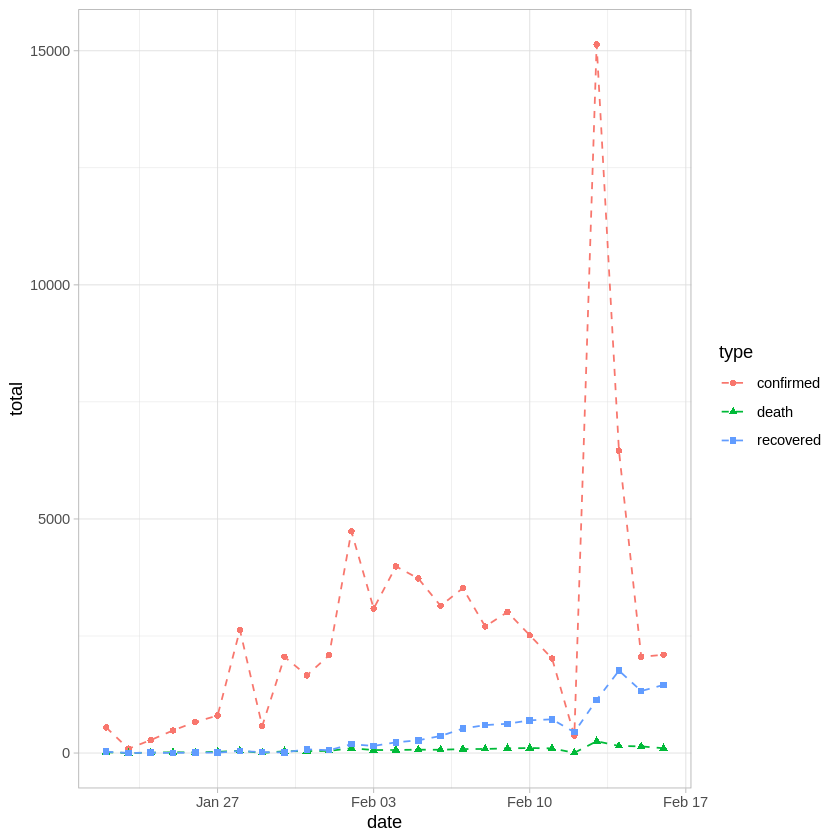

In [0]:
ggplot(China_stats_date, aes(x = date, y = total, col = type, shape = type)) + 
geom_line(linetype = 'dashed') + geom_point() + theme_light()

> This graph shows **the same trends** with the ***world status*** graph earlier, in other words, cases in China **dominated** the world trend, or, the data recorded **outside China** at the time was not significant.

Let's have a closer look:

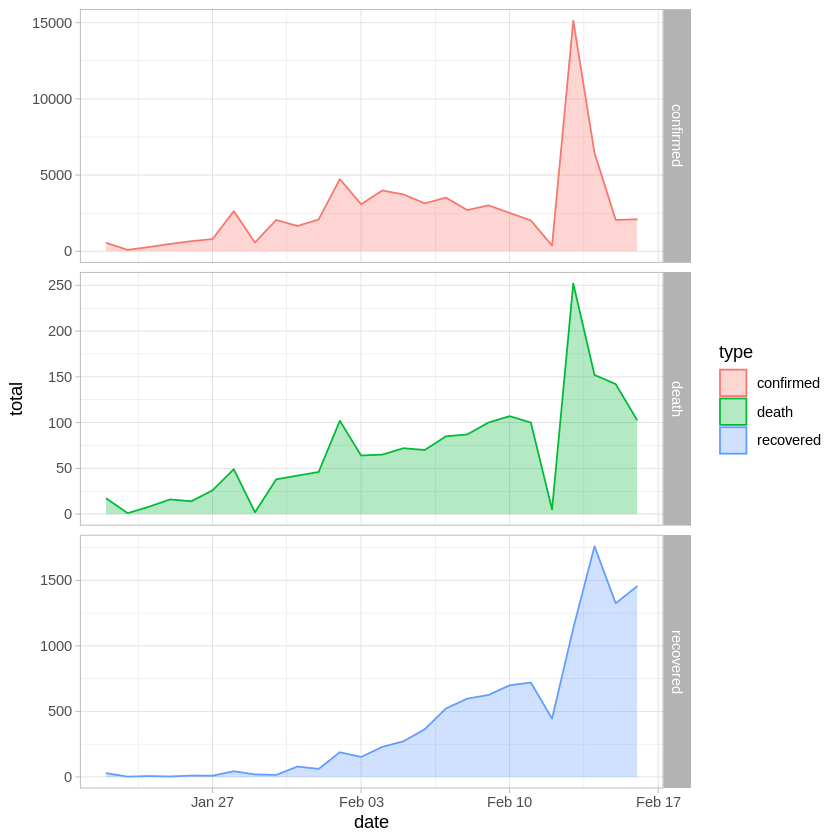

In [0]:
ggplot(China_stats_date, aes(date, total,col = type, fill = type)) + 
geom_area(alpha = .3) + facet_grid(type~., scales = 'free_y') + theme_light()

> The number of confirmed, recovered and dead cases all significantly rose and reached the **peak** on **Feb 12, 13**, followed by a **decrease** days later.

Specific analysis of each type will help us have a better understanding of the situation.

In [0]:
confirmed_China <- confirmed %>% filter(Country.Region == 'Mainland China')
recovered_China <- recovered %>% filter(Country.Region == 'Mainland China')
death_China <- death %>% filter(Country.Region == 'Mainland China')

Let's see the **top 5 provinces** in China which has the most number of COVID-19 cases

In [0]:
confirmed_province <- confirmed_China %>% group_by(Province.State) %>% summarise(total = sum(cases)) %>% arrange(by = desc(total))
top5_province <- confirmed_province[1:5,]
top5_province

Province.State,total
<chr>,<int>
Hubei,58182
Guangdong,1316
Henan,1231
Zhejiang,1167
Hunan,1004


> The result suggests that **Hubei** witnessed ***the most confirmed cases***. It's number was far more than the sum of the other 4 in the list.

Let's inspect Hubei data further.

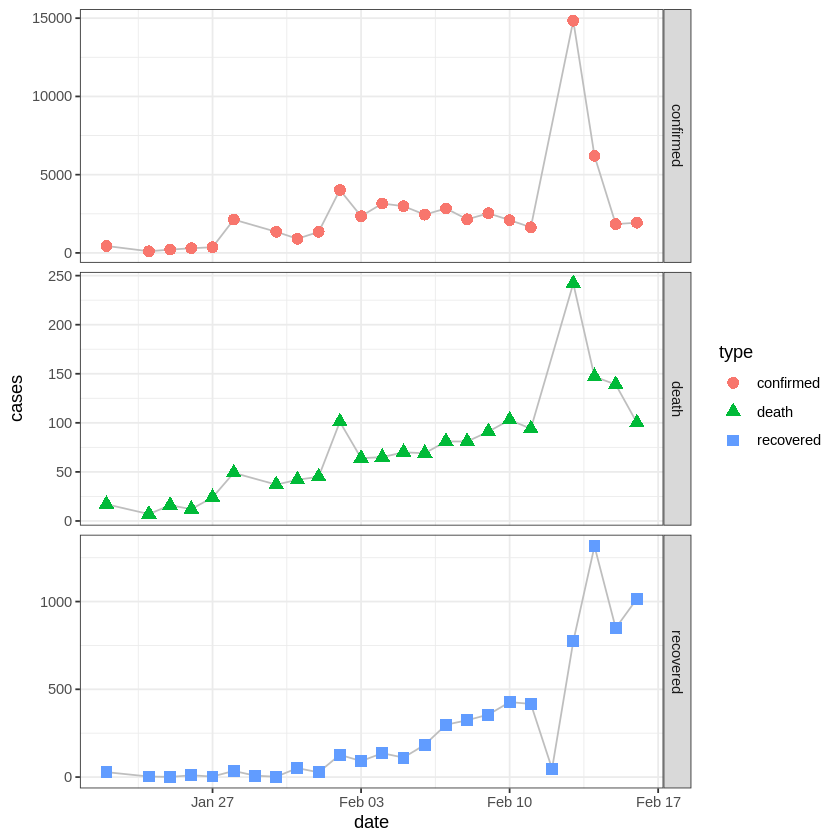

In [0]:
Hubei <- China %>% filter(Province.State == 'Hubei') %>% group_by(date)
ggplot(Hubei, aes(x = date, y = cases, shape = type, col = type)) + geom_line(color = 'grey') + 
geom_point(size=3) + facet_grid(type~., scales = 'free_y') + theme_bw()

> Is is easily seen that there was an **exceptionally increase** in the number of cases of all type on **Feb 12, 13**. This can be explained by the new counting system adopted. The province started to include “***clinically diagnosed***” cases in its figures and that significant number of the new cases fall under that classification.

> Once again we can see that the trend is similar to the statistics of the *whole China* region and *the world.* We can make interpretation at this point that the data recorded in **Hubei** represents the whole dataset.

How was the situation in Mainland China look like on the map? Let's figure it out!

First, we have to make some changes in the data.

In [0]:
map_China <- map_data('world') %>% filter(region == 'China')
map_China_by_location <- China %>% group_by(Province.State, Lat, Long, type) %>% summarise(total = sum(cases))
head(map_China_by_location)

Province.State,Lat,Long,type,total
<chr>,<dbl>,<dbl>,<fct>,<int>
Anhui,31.82571,117.2264,confirmed,962
Anhui,31.82571,117.2264,death,6
Anhui,31.82571,117.2264,recovered,255
Beijing,40.18238,116.4142,confirmed,380
Beijing,40.18238,116.4142,death,4
Beijing,40.18238,116.4142,recovered,108


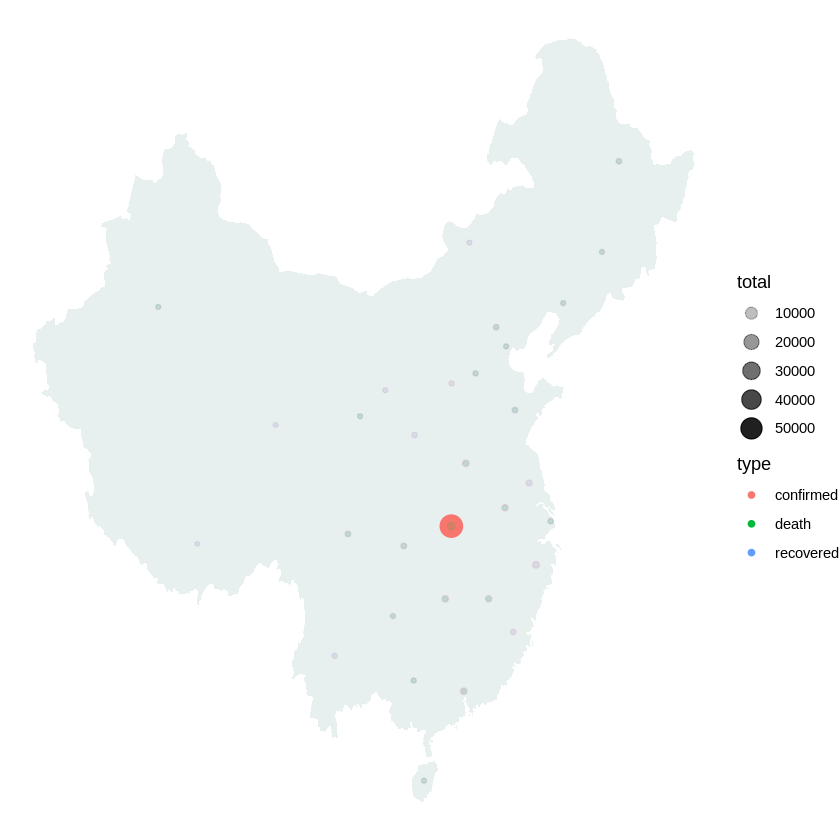

In [0]:
ggplot() + geom_polygon(data = map_China, aes(x = long, y = lat, group = group), fill = '#d1e0e0', alpha = 0.5) +
geom_point( data=map_China_by_location, aes(x=Long, y=Lat, size=total, color=type, alpha = total)) + theme_void()

> The map shows the presence of thi virus across Mainland China, with the significant figure of confirm cases in the largest shape.

let's create a variable called **`rate_China`** to calculate the recovery rate and death rate of each province.



In [0]:
rate_China <- China %>% group_by(Province.State, type) %>% summarise(total = sum(cases))
rate_China <- rate_China %>% spread(type, total)
rate_China <- rate_China %>% mutate(death_rate = round(death/confirmed, 3), recovery_rate = round(recovered/confirmed, 3))
head(rate_China)

Province.State,confirmed,death,recovered,death_rate,recovery_rate
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
Anhui,962,6,255,0.006,0.265
Beijing,380,4,108,0.011,0.284
Chongqing,551,5,207,0.009,0.376
Fujian,287,NA,82,NA,0.286
Gansu,90,2,54,0.022,0.600
Guangdong,1316,2,465,0.002,0.353


> As we can see, if there is no recovery or death cases, the result will become **NA**, which doensn't make sense. We will replace these values with **0** to make the final result comprehensible.

In [0]:
rate_China$death_rate[is.na(rate_China$death_rate)] <- 0
rate_China$recovery_rate[is.na(rate_China$recovery_rate)] <- 0
head(rate_China)

Province.State,confirmed,death,recovered,death_rate,recovery_rate
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
Anhui,962,6,255,0.006,0.265
Beijing,380,4,108,0.011,0.284
Chongqing,551,5,207,0.009,0.376
Fujian,287,NA,82,0.000,0.286
Gansu,90,2,54,0.022,0.600
Guangdong,1316,2,465,0.002,0.353


> We will change the struture of the table to the desired format for visualisation by using **`gather()`** function.

In [0]:
rate_China <- rate_China %>% gather('type', 'rate', 5:6)
head(rate_China)

Province.State,confirmed,death,recovered,type,rate
<chr>,<int>,<int>,<int>,<chr>,<dbl>
Anhui,962,6,255,death_rate,0.006
Beijing,380,4,108,death_rate,0.011
Chongqing,551,5,207,death_rate,0.009
Fujian,287,NA,82,death_rate,0.000
Gansu,90,2,54,death_rate,0.022
Guangdong,1316,2,465,death_rate,0.002


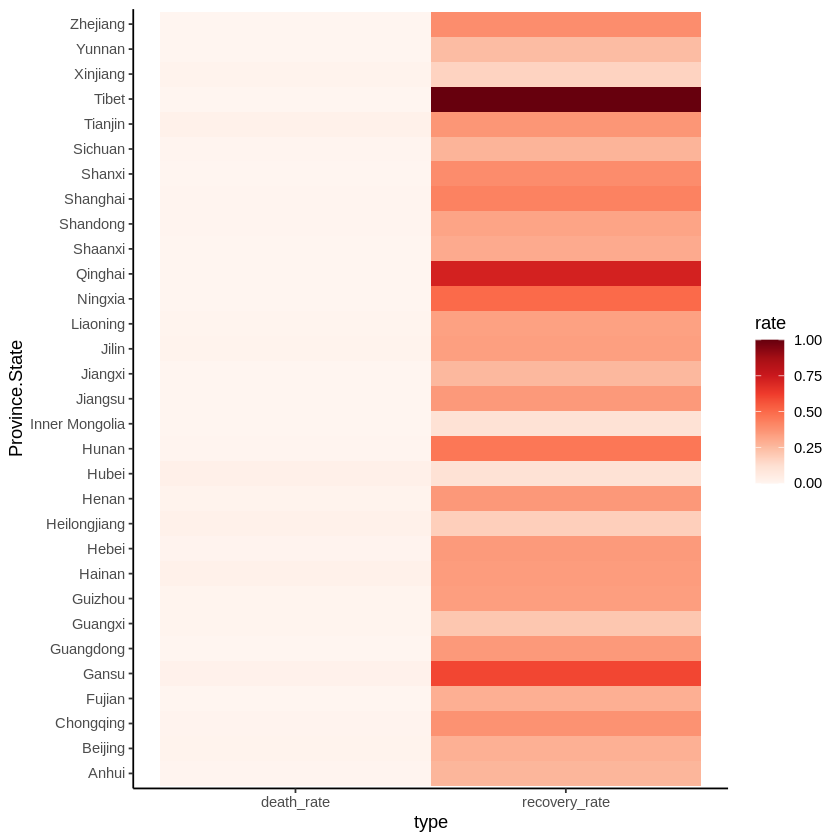

In [0]:
myColors <- brewer.pal(9, "Reds")
ggplot(rate_China, aes(x = type, y = Province.State, fill = rate)) + 
geom_tile() +scale_fill_gradientn(colors = myColors) + theme_classic()

> From the heat map above, you can compare the **death rate** and the recovery rate throughout all the provinces. For example, the while the death rate show an overall low rate, the recovery rate is much higher. Especially in **Tibert**, the recovery rate is nearly **1**, in other words, all the cases confirmed in Tibert had recovered at the time.

#### ***Outside China Analysis***

In this part, we will come to have some analysis of the COVID-19 situation in the rest part of the world.

First, we will filter out the data belongs to only those regions for further analysis.

In [0]:
outside <- corona %>% filter(Country.Region != 'Mainland China')
head(outside)

Province.State,Country.Region,Lat,Long,date,cases,type
<chr>,<chr>,<dbl>,<dbl>,<date>,<int>,<fct>
,Japan,35.6762,139.6503,2020-01-22,2,confirmed
,South Korea,37.5665,126.9780,2020-01-22,1,confirmed
,Thailand,13.7563,100.5018,2020-01-22,2,confirmed
Macau,Macau,22.1987,113.5439,2020-01-22,1,confirmed
"Seattle, WA",US,47.7511,-120.7400,2020-01-22,1,confirmed
Taiwan,Taiwan,23.6978,120.9605,2020-01-22,1,confirmed


In [0]:
str(outside)

tibble [260 × 7] (S3: tbl_df/tbl/data.frame)
 $ Province.State: chr [1:260] "" "" "" "Macau" ...
 $ Country.Region: chr [1:260] "Japan" "South Korea" "Thailand" "Macau" ...
 $ Lat           : num [1:260] 35.7 37.6 13.8 22.2 47.8 ...
 $ Long          : num [1:260] 140 127 101 114 -121 ...
 $ date          : Date[1:260], format: "2020-01-22" "2020-01-22" ...
 $ cases         : int [1:260] 2 1 2 1 1 1 1 1 2 2 ...
 $ type          : Factor w/ 3 levels "confirmed","death",..: 1 1 1 1 1 1 1 1 1 1 ...


> The structure table points out that only **260 datapoints** were recorded outside China in this period. 

In [0]:
summary(outside)

 Province.State     Country.Region          Lat              Long        
 Length:260         Length:260         Min.   :-37.81   Min.   :-123.12  
 Class :character   Class :character   1st Qu.: 13.54   1st Qu.:  53.85  
 Mode  :character   Mode  :character   Median : 23.42   Median : 104.41  
                                       Mean   : 22.97   Mean   :  79.99  
                                       3rd Qu.: 37.57   3rd Qu.: 121.77  
                                       Max.   : 61.92   Max.   : 153.03  
      date                cases               type    
 Min.   :2020-01-22   Min.   : 1.000   confirmed:201  
 1st Qu.:2020-01-30   1st Qu.: 1.000   death    :  5  
 Median :2020-02-05   Median : 1.000   recovered: 54  
 Mean   :2020-02-04   Mean   : 3.558                  
 3rd Qu.:2020-02-12   3rd Qu.: 3.000                  
 Max.   :2020-02-16   Max.   :71.000                  

> Some basic statistics about the **`outside`** variable. As you can see, over the given period, **201** cases were **confirmed** outside China, in which **54 recovered** and **5 died** 

In [0]:
outside_stats_date <- outside %>% group_by(date, type) %>% summarise(total = sum(cases))
head(outside_stats_date)

date,type,total
<date>,<fct>,<int>
2020-01-22,confirmed,8
2020-01-23,confirmed,7
2020-01-24,confirmed,11
2020-01-25,confirmed,10
2020-01-26,confirmed,21
2020-01-26,recovered,3


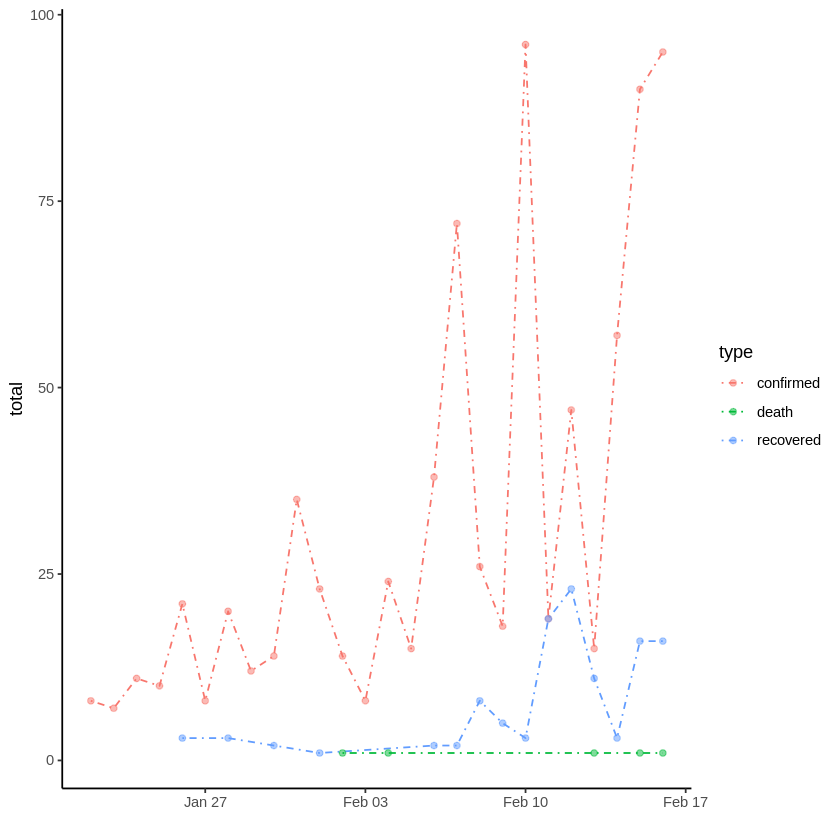

In [0]:
ggplot(outside_stats_date, aes(date, total, col = type)) + geom_line(linetype = 'dotdash') + 
geom_point(alpha = .5) + xlab('') + theme_classic()

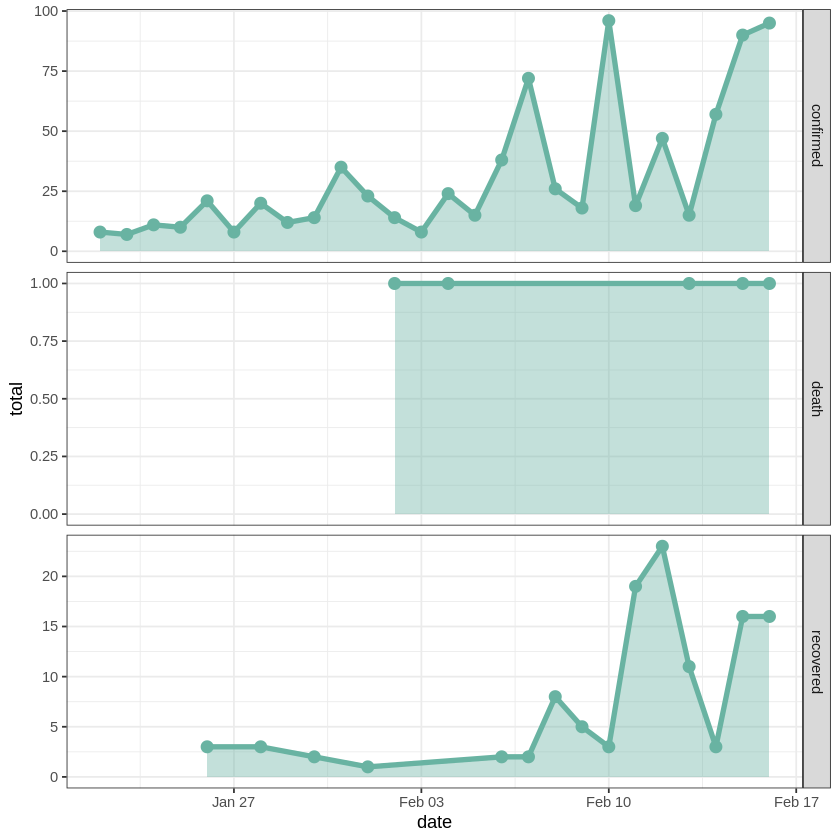

In [0]:
ggplot(outside_stats_date, aes(date, total)) + geom_area(fill="#69b3a2", alpha=0.4) + 
geom_line(color="#69b3a2", size=1.5) + geom_point(size=3, color="#69b3a2") + 
facet_grid(type~., scales = 'free_y') + theme_bw()

> The above plot shows us that the highest number of new cases was recorded on Feb 10. The death graph shows a straight horizontal line connected 5 points, which means there were only **five days** death cases were recorded and the number was just **1 per day**.

In [0]:
outside_stats_country <- outside %>% group_by(Country.Region, type) %>% summarise(total = sum(cases))
head(outside_stats_country)

Country.Region,type,total
<chr>,<fct>,<int>
Australia,confirmed,17
Australia,recovered,8
Belgium,confirmed,1
Cambodia,confirmed,1
Cambodia,recovered,1
Canada,confirmed,7


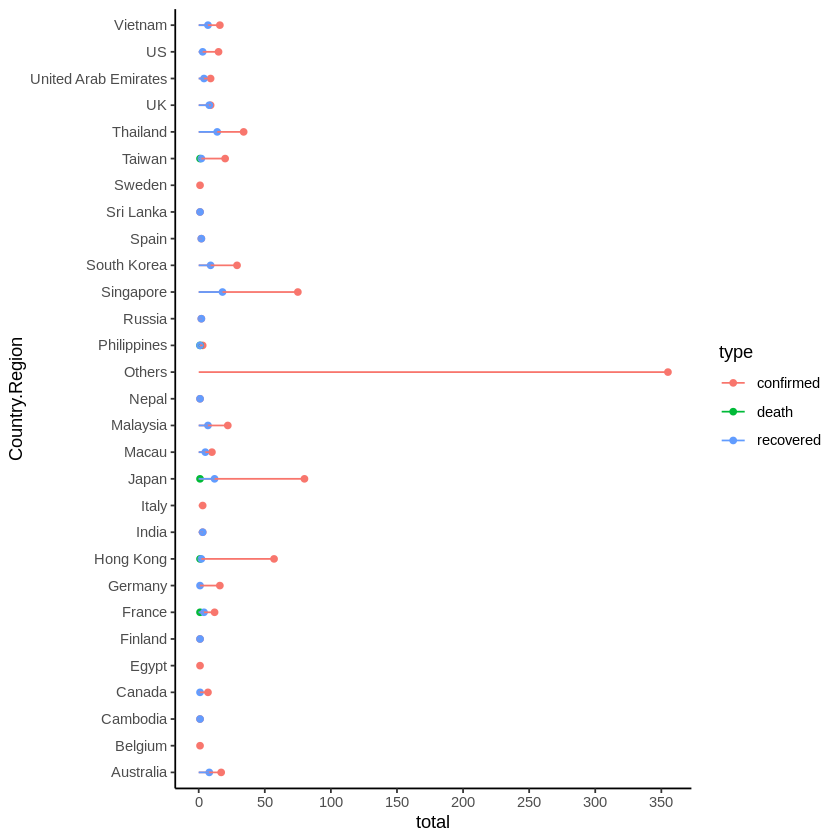

In [0]:
ggplot(outside_stats_country, aes(Country.Region, total, col = type)) + geom_point() + 
geom_segment(aes(x = Country.Region, xend = Country.Region, y = 0, yend = total)) + coord_flip() + 
scale_y_continuous(breaks = seq(0, 350, by = 50)) + theme_classic()

> From this visualisation, we can easily detect that apart from a group of other countries (others), **Singapore**, **Japan** and **Hongkong** had the most cases of COVID-19. We can also compare the number of death/ recovered cases within the country and with other countries.

Let's calculate the death rate and recovery rate of each country

In [0]:
rate_outside <- outside %>% group_by(Country.Region, type) %>% summarise(total = sum(cases))
rate_outside <- rate_outside %>% spread(type, total)
rate_outside <- rate_outside %>% mutate(death_rate = round(death/confirmed, 3), recovery_rate = round(recovered/confirmed, 3))
head(rate_outside)

Country.Region,confirmed,death,recovered,death_rate,recovery_rate
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
Australia,17,NA,8,NA,0.471
Belgium,1,NA,NA,NA,NA
Cambodia,1,NA,1,NA,1.000
Canada,7,NA,1,NA,0.143
Egypt,1,NA,NA,NA,NA
Finland,1,NA,1,NA,1.000


In [0]:
rate_outside$death_rate[is.na(rate_outside$death_rate)] <- 0
rate_outside$recovery_rate[is.na(rate_outside$recovery_rate)] <- 0
head(rate_outside)

Country.Region,confirmed,death,recovered,death_rate,recovery_rate
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
Australia,17,NA,8,0,0.471
Belgium,1,NA,NA,0,0.000
Cambodia,1,NA,1,0,1.000
Canada,7,NA,1,0,0.143
Egypt,1,NA,NA,0,0.000
Finland,1,NA,1,0,1.000


> As suggested from the previous figures and this table, we can see that the death rate outside China is significantly low.

In [0]:
rate_outside <- rate_outside %>% gather('type', 'rate', 5:6)
head(rate_outside)

Country.Region,confirmed,death,recovered,type,rate
<chr>,<int>,<int>,<int>,<chr>,<dbl>
Australia,17,NA,8,death_rate,0
Belgium,1,NA,NA,death_rate,0
Cambodia,1,NA,1,death_rate,0
Canada,7,NA,1,death_rate,0
Egypt,1,NA,NA,death_rate,0
Finland,1,NA,1,death_rate,0


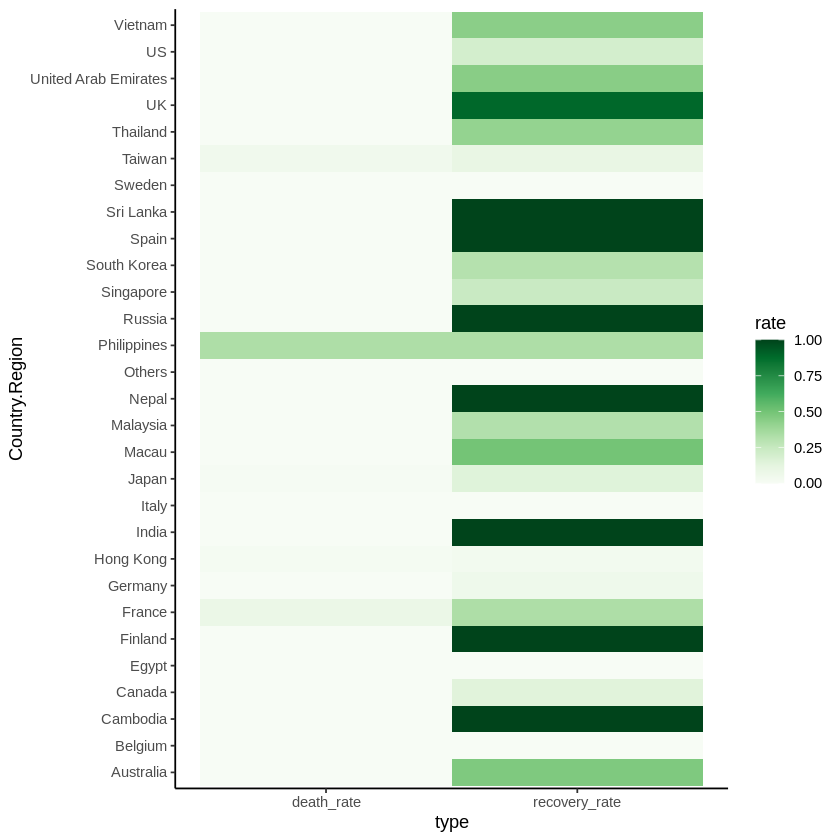

In [0]:
myColors1 <- brewer.pal(9, "Greens")
ggplot(rate_outside, aes(x = type, y = Country.Region, fill = rate)) + 
geom_tile() +scale_fill_gradientn(colors = myColors1) + theme_classic()

> This graph shows that over the given period, **Philipines** had the same **death rate** and **recovery rate** while most of the rest countries show a perfect **recovery rate** of ***1***, namely Cambodia, Srilanka, India, Nepal, Spain, Finland and Russia.

---
## **This is the end of the Data Analysis Project on the coronavirus dataset. The insights derived can be used to describe the spread of the deadly virus and also evaluate the efficiency of countries in dealing with COVID-19 at the time.**
---
# ***Thanks for your attention!***
